# <center>Рекомендательные системы
Методы построения рекомендательных систем можно представить следующим образом:

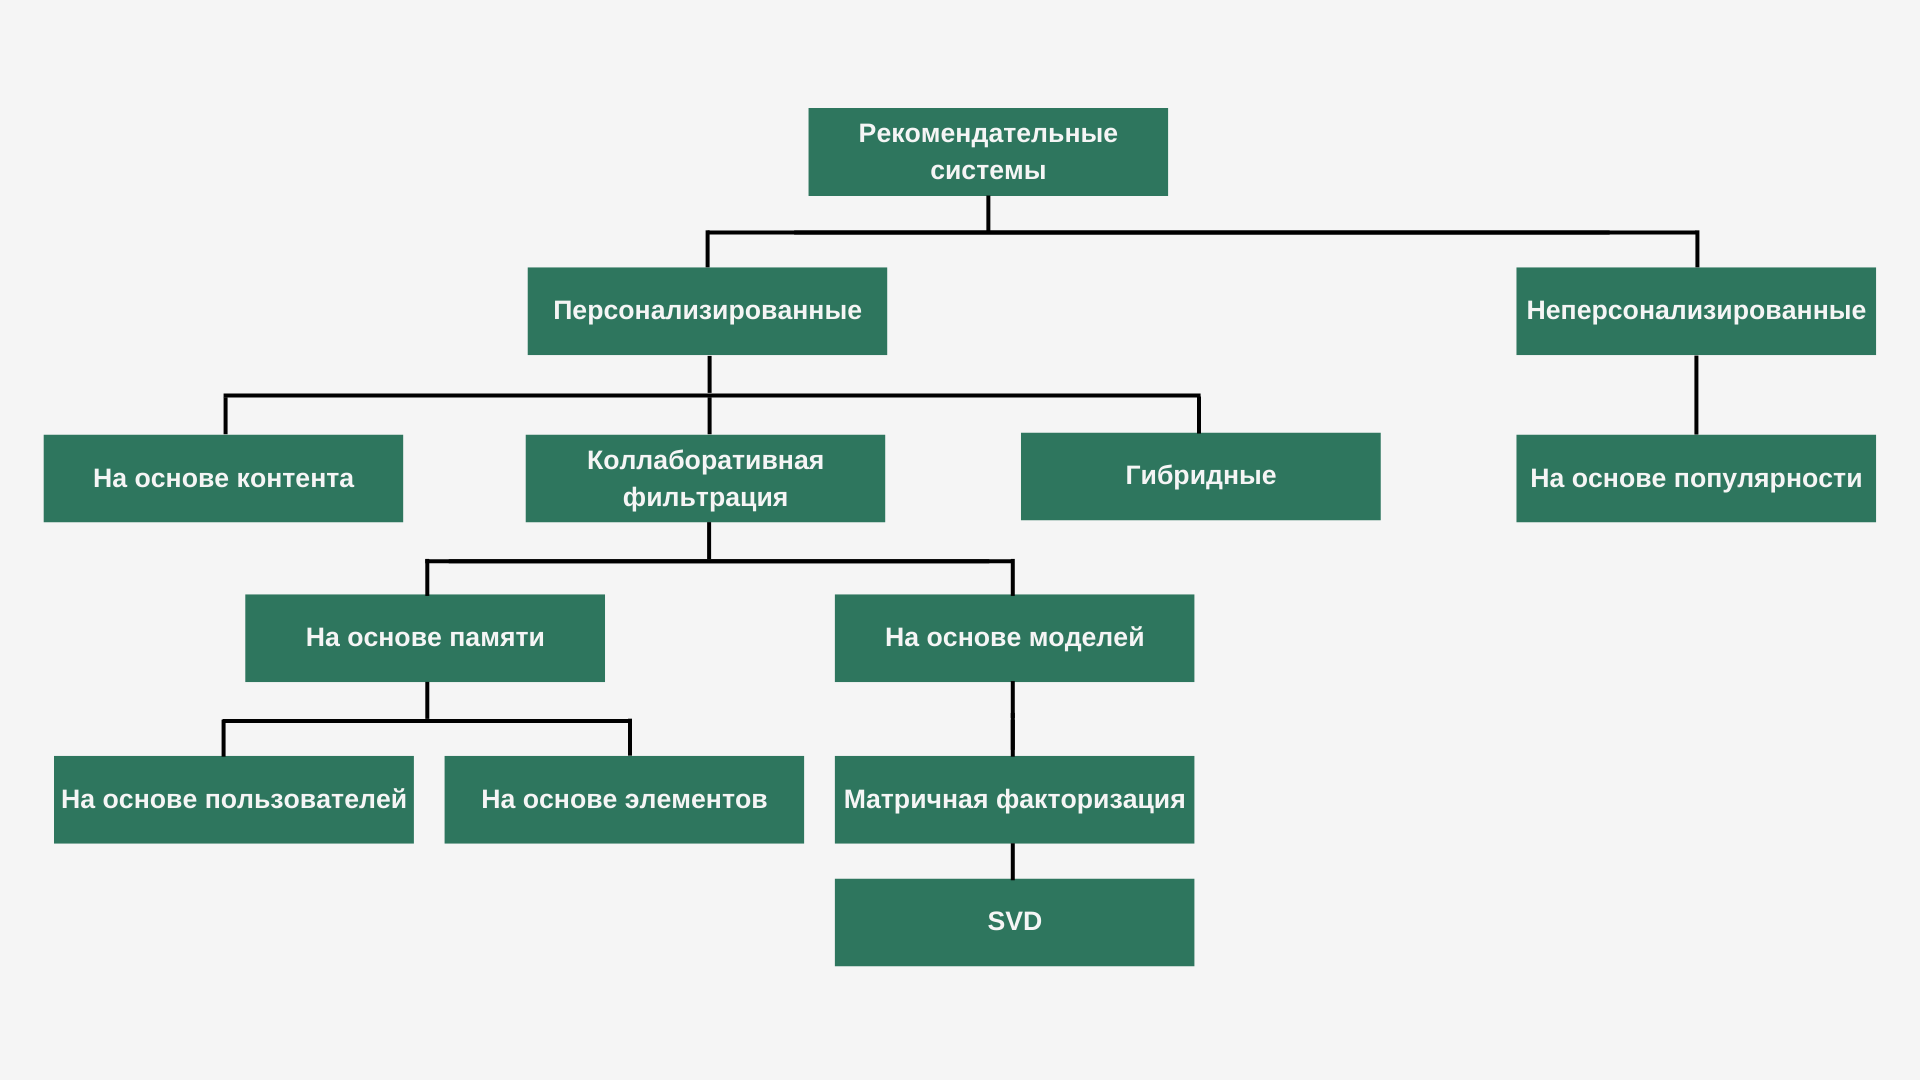

# <center>Данные для рекомендательной системы
Существует два способа сбора данных для рекомендательных систем — **явный** (англ. *explicit feedback, explicit ratings*) и **неявный** (англ. *implicit feedback, implicit ratings*). Далее мы рассмотрим оба подхода и связанные с ними проблемы.

# <center>Явный сбор данных (Explicit feedback)
В рамках явного сбора данных получают ту информацию, которую передают сами пользователи, например это оценки фильмов на *Netflix* или товаров на *Amazon*. Явные отзывы учитывают мнение пользователя о том, насколько ему понравился или не понравился продукт. Данные явных отзывов легко поддаются количественной оценке.

Однако использование таких данных сопряжено с рядом **проблем**:
* После сбора явных отзывов вы с большой вероятностью получите набор оценок **с ярко выраженной полярностью**.

    Когда вы последний раз оставляли отзыв на какой-то товар или фильм? Очень часто люди ставят оценку только в случае, если что-либо вызвало у них очень сильные эмоции, преимущественно негативные.

* Явные отзывы **не учитывают контекст**, в котором был оценён тот или иной продукт.

    Допустим, вам срочно нужно подтянуть уровень английского, чтобы пройти собеседование. Вы находите отличный самоучитель и ставите ему наивысшую оценку. Однако это вовсе не значит, что теперь для вас релевантны рекомендации учебников по иностранным языкам.

* Также есть **сложности с выстраиванием системы оценок**: необходимо придумать такую шкалу, чтобы пользователям было легко выражать своё мнение и это действие не вызывало у них раздражение.

Обычно данные с явной обратной связью выглядят следующим образом:  
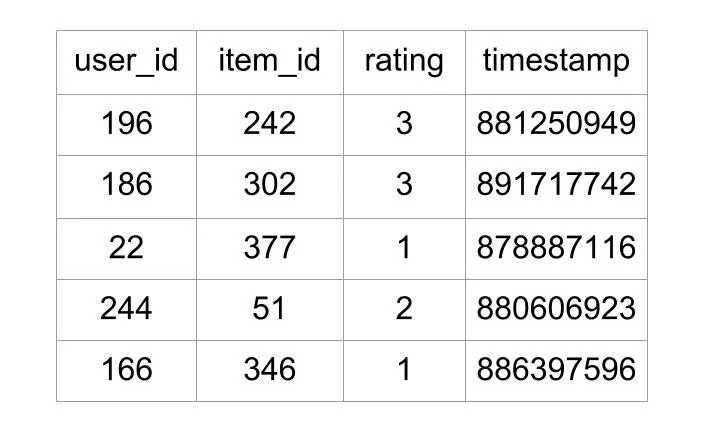

Здесь есть некоторый *id* пользователя (*user_id*), *id* оцениваемого этим пользователем продукта (*item_id*), выставленный рейтинг (*rating*) и некоторая дополнительная информация, например временная отсечка (*timestamp*).

В качестве *timestamp* здесь фиксируется часто используемый показатель, отражающий количество секунд, прошедших с 1 января 1970 года.

# <center>Неявный сбор данных (Implicit feedback)
Неявная обратная связь не отражает непосредственный интерес пользователя, но действует как косвенный показатель этого интереса.

Примерами неявных данных являются история просмотров, клики по ссылкам, подсчёт количества проигрываний песни, процент прокрутки веб-страницы или даже движение курсора по странице. Такие данные собирают практически все интернет-сервисы. Любая социальная сеть (ВК, TikTok и т. д.) регистрируют все возможные действия пользователя.

Объёмы данных неявной обратной связи огромны, и их легко собирать, ведь они не требуют дополнительных действий от пользователя — как только вы получаете разрешение пользователя на сбор его данных, вы можете спокойно использовать информацию о его действиях.

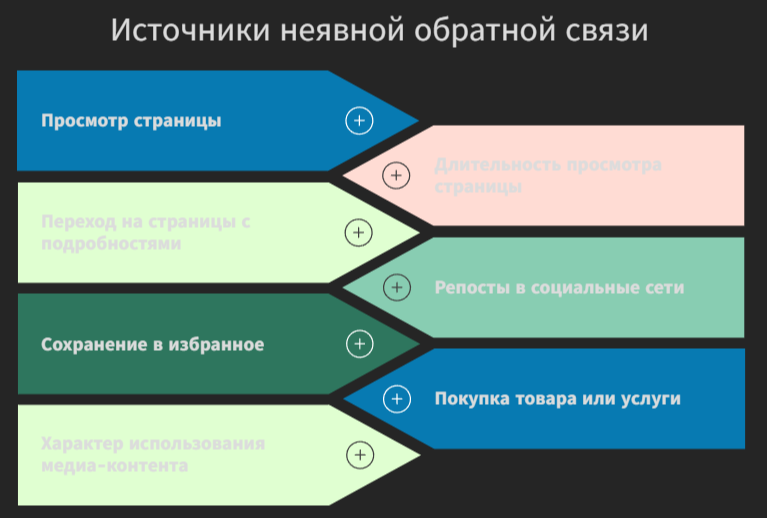

Также стоит упомянуть о некоторых особенностях неявных данных:

* **Отсутствие прямого измерения негативных предпочтений.**

    В отличие от явных отзывов, когда пользователь ставит плохую оценку, у нас нет прямого способа измерить негативное отношение пользователя к продукту. Если пользователь много раз слушает одну и ту же песню, мы можем сделать вывод, что она ему нравится, и посоветовать похожую. Однако если какую-то песню он вообще не слушает, это не значит, что он негативно к ней относится — возможно, он даже не знает о её существовании. Таким образом, через неявные реакции мы можем точно оценивать лишь положительное отношение.

* **Возможность делать верные выводы по численному выражению обратной связи.**

    Если выразить неявную обратную связь в численном эквиваленте, мы сможем однозначно определять, насколько какой-то товар или контент привлекают пользователя. К примеру, если человек слушает Бетховена намного больше, чем песни группы Rammstein, то мы можем сделать вывод, что произведения Бетховена привлекают его больше.

* **Большой объём зашумлённых данных.**

    Прежде чем использовать данные неявной обратной связи для построения рекомендательной системы, придётся потратить много времени на их предобработку.

